In [17]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [18]:
csv = "Data/Cleaned_Data.csv"
car_df = pd.read_csv(csv)
car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [19]:
# How many of each model are in the overall market?
counts = car_df["New_Model"].value_counts()
counts

Altima        15967
Rogue         10491
Sentra         7664
Versa          5510
Pathfinder     4434
Murano         4338
Maxima         3785
Titan          1994
Armada         1334
Quest          1033
Xterra          938
370Z            902
NV              505
GT-R            137
Name: New_Model, dtype: int64

In [20]:
# How many of each model by model year are in the market?
model_df = car_df.sort_values(by="Year").drop(['Price'], axis=1)
model_df = model_df.groupby(["New_Model", "Year"]).count()
model_df = pd.pivot_table(model_df, values="Mileage", index="Year", columns="New_Model")
model_df

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1998,NaN,4.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN
1999,NaN,10.0,NaN,NaN,6.0,NaN,NaN,6.0,1.0,NaN,1.0,NaN,NaN,NaN
2000,NaN,5.0,NaN,NaN,15.0,NaN,NaN,6.0,2.0,NaN,5.0,NaN,NaN,13.0
2001,NaN,13.0,NaN,NaN,19.0,NaN,NaN,15.0,3.0,NaN,4.0,NaN,NaN,17.0
2002,NaN,22.0,NaN,NaN,12.0,NaN,NaN,12.0,4.0,NaN,10.0,NaN,NaN,27.0
2003,NaN,44.0,NaN,NaN,18.0,26.0,NaN,16.0,NaN,NaN,12.0,NaN,NaN,29.0
2004,NaN,18.0,NaN,NaN,38.0,51.0,NaN,42.0,17.0,NaN,30.0,44.0,NaN,43.0
2005,NaN,92.0,34.0,NaN,32.0,88.0,NaN,61.0,14.0,NaN,34.0,67.0,NaN,48.0


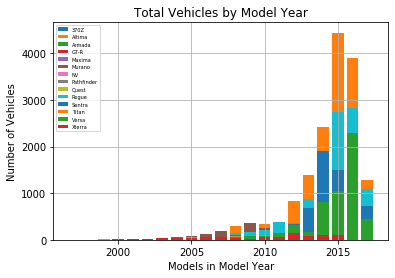

In [22]:
# Bar chart showing how many of each vehicle by model year are in the overall market.
fig,ax = plt.subplots()
columns = list(model_df)
plt.xlabel("Models in Model Year")
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles by Model Year')

plt.grid()
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.bar(range(idx, ldx2), x.loc[idx:ldx], label=i)

plt.legend(loc='upper left',fontsize=5)

plt.savefig('Total Vehicles by Model Year')

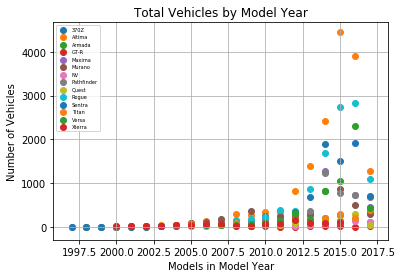

In [23]:
# Scatter chart to see if the data looks any different - ...how many of each vehicle by model year are in the overall market.
fig,ax = plt.subplots()
columns = list(model_df)
plt.xlabel("Models in Model Year")
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles by Model Year')

plt.grid()
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.scatter(range(idx, ldx2), x.loc[idx:ldx], label=i)

plt.legend(loc='upper left',fontsize=5)
plt.savefig('Total Vehicles by Model Year - scatter')

In [24]:
CarCounts = car_df["Year"].value_counts()
car_df["CarCounts"] = CarCounts

car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model,CarCounts
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima,NaN
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima,NaN
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima,NaN
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra,NaN
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima,NaN


In [25]:
model_df = car_df.sort_values(by="Year").drop(['Price'], axis=1)
model_df = pd.pivot_table(model_df, values="Mileage", index="Year", columns="New_Model")
columns = list(model_df)
model_df

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,161766.250000,NaN,NaN,NaN,NaN,NaN,39484.000000,NaN,NaN,NaN
1998,NaN,187017.000000,NaN,NaN,157838.333333,NaN,NaN,164149.333333,133823.500000,NaN,199282.500000,NaN,NaN,NaN
1999,NaN,166792.500000,NaN,NaN,146557.500000,NaN,NaN,159798.500000,104448.000000,NaN,147815.000000,NaN,NaN,NaN
2000,NaN,145632.600000,NaN,NaN,140921.733333,NaN,NaN,159709.166667,174214.500000,NaN,129104.400000,NaN,NaN,275615.076923
2001,NaN,149427.538462,NaN,NaN,165790.894737,NaN,NaN,156073.933333,194257.000000,NaN,129907.500000,NaN,NaN,170977.000000
2002,NaN,139968.500000,NaN,NaN,151276.583333,NaN,NaN,149288.833333,162565.500000,NaN,107171.500000,NaN,NaN,147705.074074
2003,NaN,147460.659091,NaN,NaN,161843.111111,128912.346154,NaN,151686.812500,NaN,NaN,119729.666667,NaN,NaN,138125.965517
2004,NaN,156974.277778,NaN,NaN,136322.973684,138633.411765,NaN,137057.238095,121300.941176,NaN,129768.433333,140878.022727,NaN,146873.744186
2005,NaN,137203.489130,139259.647059,NaN,149061.875000,136874.136364,NaN,137451.442623,114369.785714,NaN,116337.705882,141928.223881,NaN,136909.958333


In [26]:
# Data showing count of models by model year in market.
cdf = car_df.New_Model.groupby(car_df.Year).value_counts()
print(cdf)

Year  New_Model 
1997  Maxima          4
      Sentra          1
1998  Altima          4
      Maxima          3
      Pathfinder      3
                   ... 
2017  Murano        303
      370Z          122
      NV            121
      Quest          45
      GT-R           13
Name: New_Model, Length: 200, dtype: int64


Text(413.875, 0.5, 'Number of Vehicles')

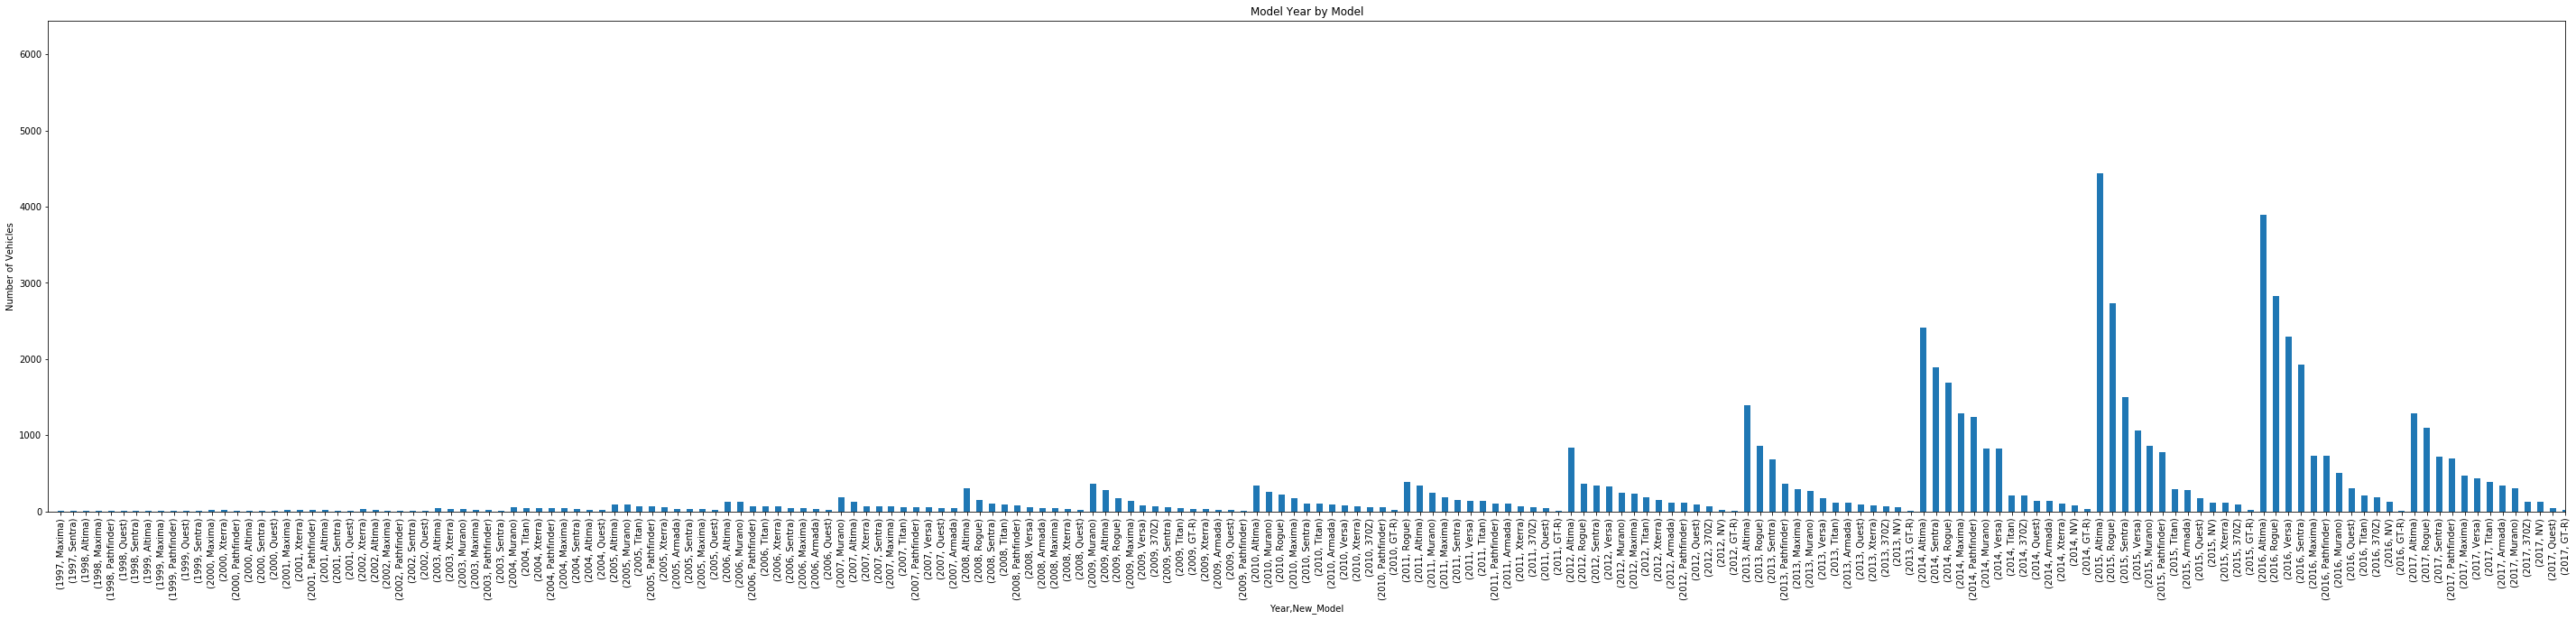

In [27]:
# Graph model year by model to see how many of each are available in market.
x_axis = np.arange(len(cdf))
cdf.plot.bar(subplots=True, figsize=(50,10))
# plt.bar(x_axis,cdf, color='r', alpha=0.5, align="center")
plt.savefig('MY by Model.png')

plt.xlim(-1, len(x_axis)-1)
plt.ylim(0, max(cdf)+2000)
plt.title("Model Year by Model")
plt.ylabel('Number of Vehicles')
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, models)

In [28]:
# See what data looks like listing model by model year.
cdf = car_df.Year.groupby(car_df.New_Model).value_counts()
cdf.head()

New_Model  Year
370Z       2014    205
           2016    180
           2017    122
           2015     87
           2013     71
Name: Year, dtype: int64

Text(413.875, 0.5, 'Number of Vehicles')

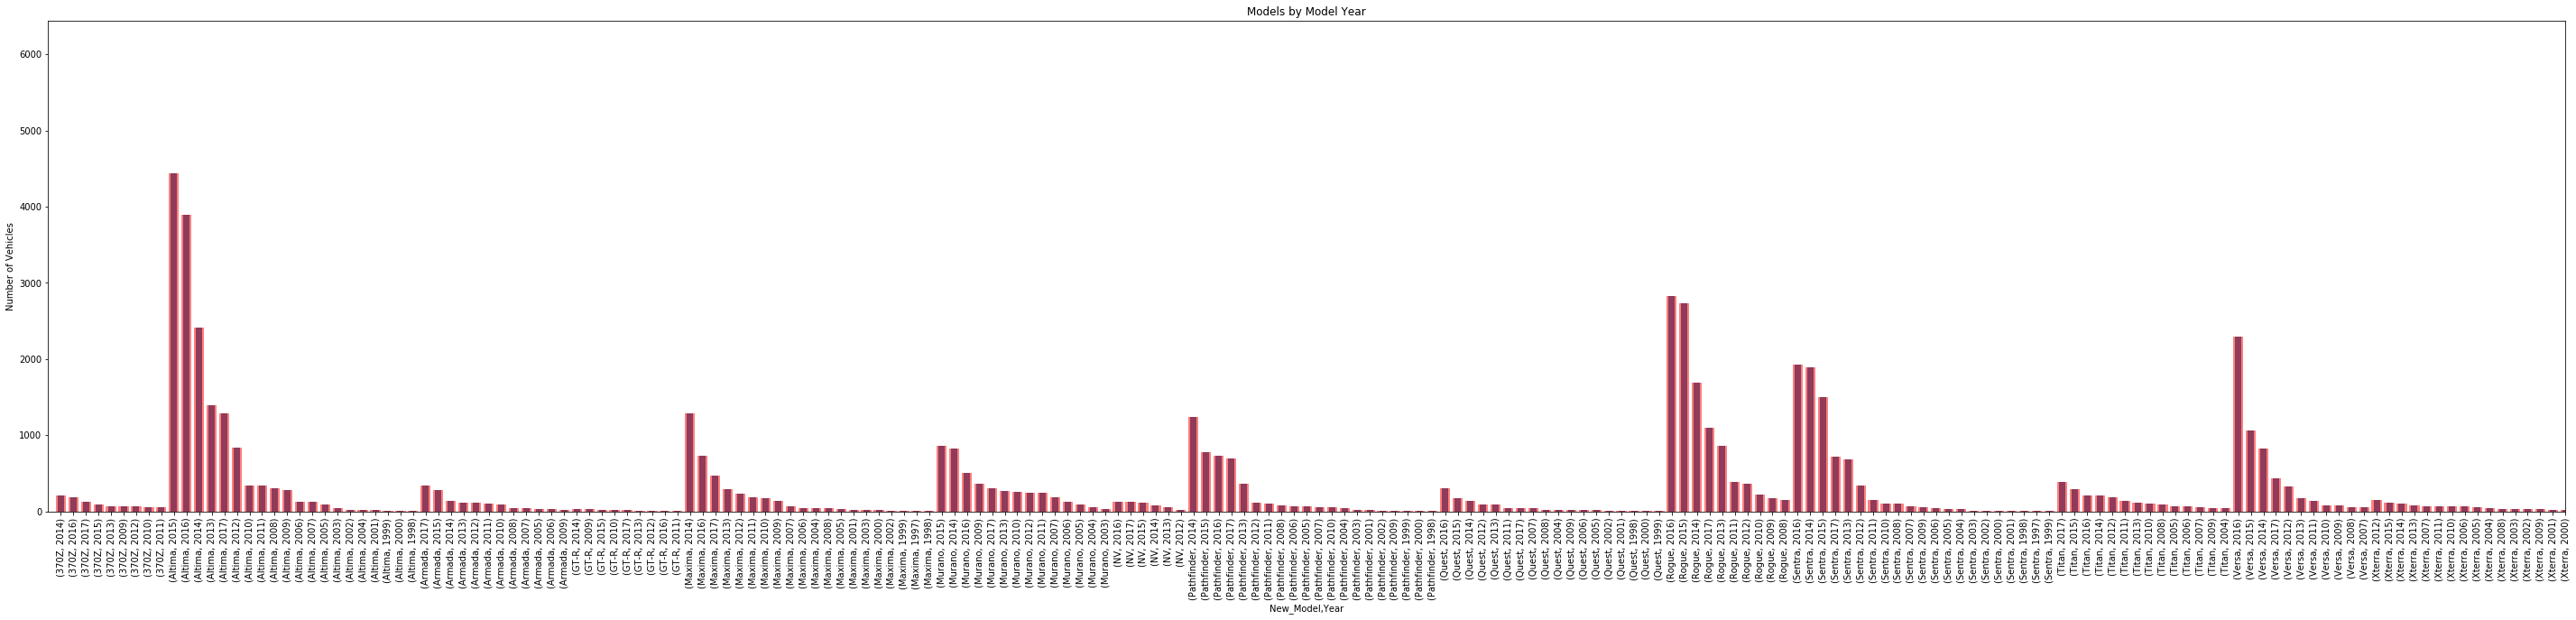

In [13]:
#Graph model by modely year to see how many of each model year are available of desired vehicle.
x_axis = np.arange(len(cdf))
cdf.plot.bar(subplots=True, figsize=(50,10))
plt.bar(x_axis,cdf, color='r', alpha=0.5, align="center")
plt.savefig('Model by Model Year.png')

plt.xlim(-1, len(x_axis)-1)
plt.ylim(0, max(cdf)+2000)
plt.title("Models by Model Year")
plt.ylabel('Number of Vehicles')
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, models)